In [16]:
import sys, os

LOCAL_PACKAGE_DIR = os.path.abspath("./keras-yolo3")
sys.path.append(LOCAL_PACKAGE_DIR)

from yolo3.model import preprocess_true_boxes, yolo_body, tiny_yolo_body, yolo_loss
from yolo3.utils import get_random_data

from yolo import YOLO
#keras-yolo에서 image처리를 주요 PIL로 수행. 
from PIL import Image
from keras.models import load_model
import pandas as pd
import numpy as np
from PIL import Image
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
dog_yolo = YOLO(model_path='/home/dsl001/캡스톤 디자인/Dog detector.h5',
                anchors_path='~/캡스톤 디자인/keras-yolo3/model_data/yolo_anchors.txt',
                classes_path='~/캡스톤 디자인/keras-yolo3/model_data/Dog_classes.txt')

dog_breed_cnn = load_model('./dog breed classifier.h5')

/home/dsl001/캡스톤 디자인/Dog detector.h5 model, anchors, and classes loaded.


In [18]:
unique_breeds = pd.read_csv('encoding_label.csv')
unique_breeds = unique_breeds.drop('Unnamed: 0', axis=1)

In [19]:
def transfer_image(img):
    resize = img.resize((224, 224))
    resize = np.array(resize)/255.
    resize = resize.reshape(1, 224, 224, 3)
    return resize

In [20]:
def get_pred_label(pred_prob):
    return unique_breeds.iloc[np.argmax(pred_prob)]['breed']

In [21]:
def plot_pred(pred_prob, pred_label, img):
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    
    plt.title("{} {:2.0f}%".format(pred_label, np.max(pred_prob)*100))

In [22]:
def plot_pred_conf(pred_prob, pred_label):
    top_10_pred_indexes = pred_prob.argsort()[0, -10:][::-1] # argsort 작은값부터 순서대로
    top_10_pred_values = pred_prob[0, top_10_pred_indexes]
    top_10_pred_labels = unique_breeds.iloc[top_10_pred_indexes]['breed']
    
    top_plot = plt.bar(np.arange(len(top_10_pred_labels)), 
                       top_10_pred_values, 
                       color="grey")
    plt.xticks(np.arange(len(top_10_pred_labels)),
               labels=top_10_pred_labels,
               rotation="vertical")
    
    if True:
        top_plot[np.argmax(pred_label)].set_color("green")

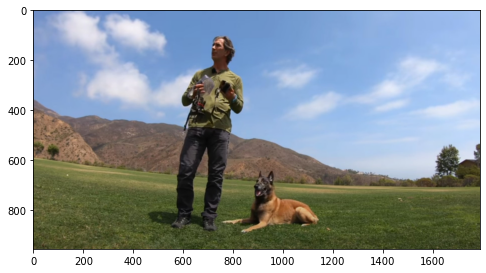

In [23]:
# plt.imshow(cv2.cvtColor(cv2.imread('/home/dsl001/캡스톤 디자인/1.jpg'), cv2.COLOR_BGR2RGB))
img = Image.open('/home/dsl001/캡스톤 디자인/화면1.jpg')
plt.figure(figsize=(8, 8))
plt.imshow(img)

In [24]:
def image_detecting(yolo_model, cnn_model, img):
    image,info = yolo_model.detect_image(img)
    image_array = np.array(image)
    
    for data in info:
        label = data[0]
        rigth_top = data[1]
        left_bottom = data[2]
        
        obj = Image.fromarray(image_array[rigth_top[1]:left_bottom[1]+1, rigth_top[0]:left_bottom[0]+1, :])
        resize = transfer_image(obj)

        pred_prob = cnn_model.predict(resize)
        pred_label = get_pred_label(pred_prob)
        plt.subplot(1, 2, 1)
        plot_pred(pred_prob, pred_label, obj)
        plt.subplot(1, 2, 2)
        plot_pred_conf(pred_prob, pred_label)
        plt.figure()
    return image

(416, 416, 3)
Found 1 boxes for img
Dog 0.65 (785, 631) (1156, 890)
5.238800388993695


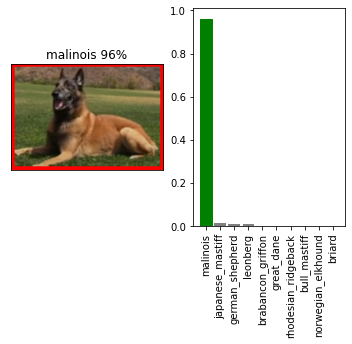

<Figure size 432x288 with 0 Axes>

In [25]:
detected_image = image_detecting(dog_yolo, dog_breed_cnn, img)

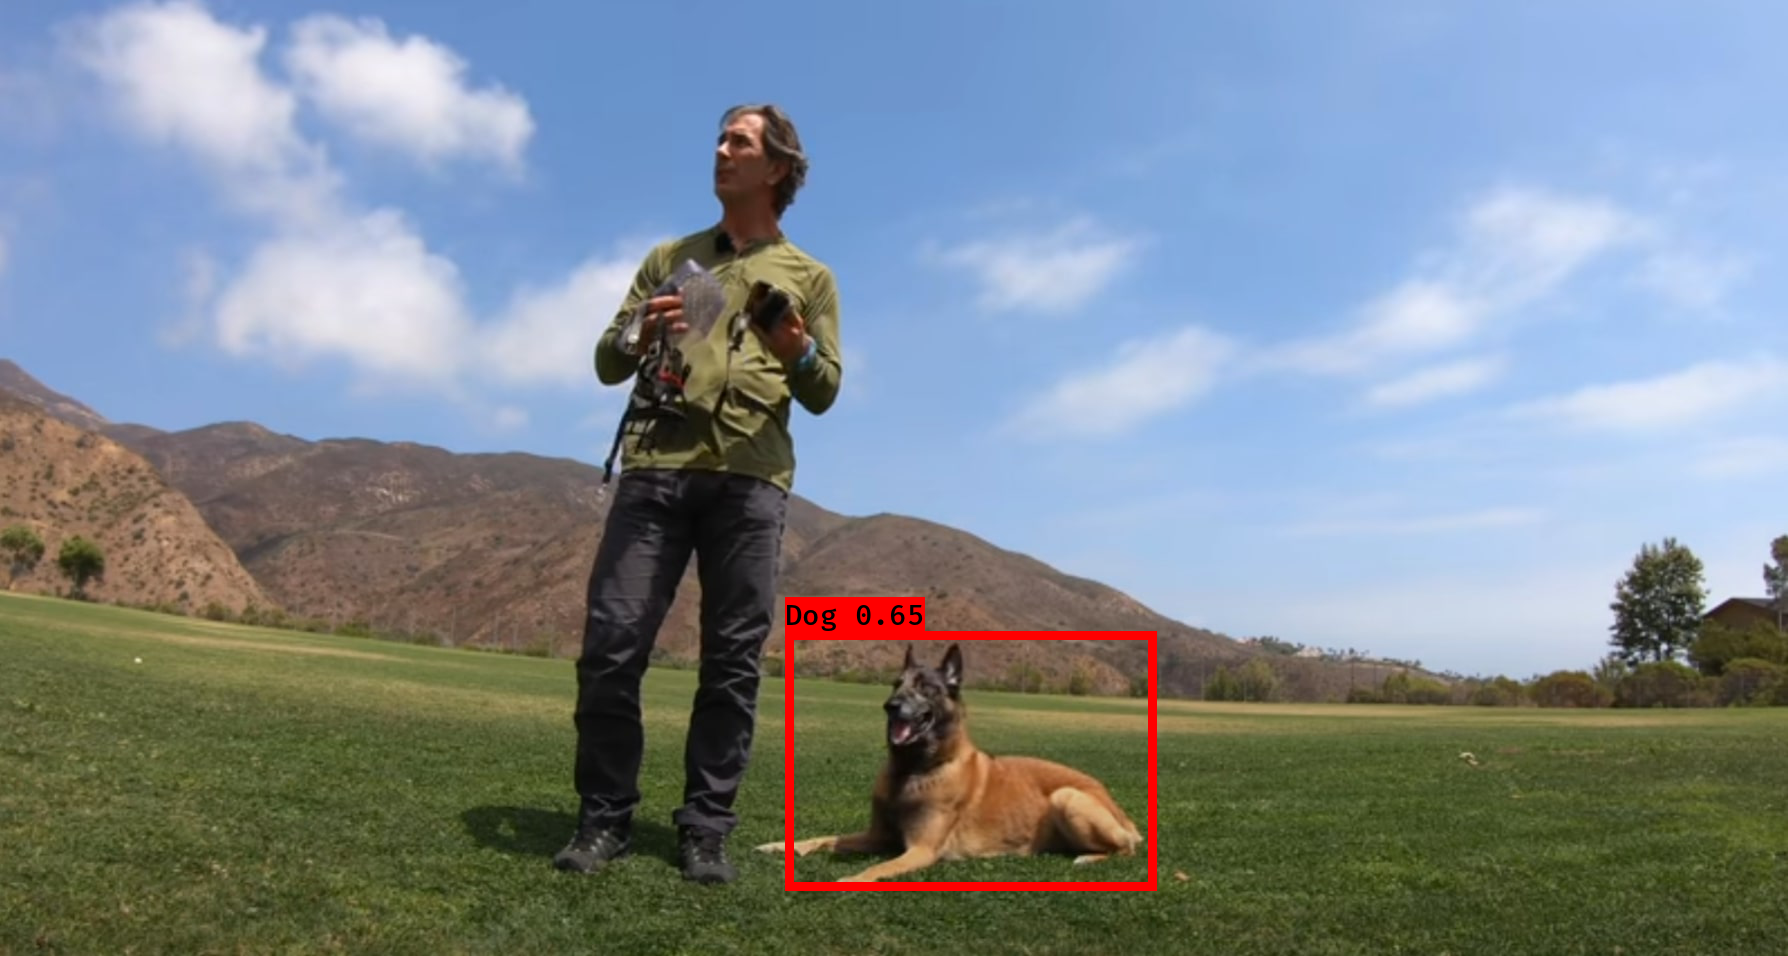

In [26]:
detected_image